# Projeto - SVM (SUPPORT VECTOR MACHINE) - Victor Tintel
<p> Vou entender com exemplos práticos como funciona o algoritmo SVM</p>
<p> Documentação oficial do Sklearn: https://scikit-learn.org/stable/modules/svm.html</p>


<p>1 - Classes Linares ou Não Lineares</p>
<p>2 - Tipos de Kernel / Truque de Kernel</p>
<p>3 - Vetores de Suporte</p>
<p>4 - Hiperplano de separação</p>

- É uma maquina de vetores de suporte utilizado tanto em modelo de classificação quanto de regressão.

In [8]:
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
# x,y = load_iris(return_X_y = True, as_frame = True)
# o dataset iris já vem nativo do sklearn

iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['rotulo'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),rotulo,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
df.shape

(150, 6)

In [18]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [20]:
df['rotulo'].value_counts()

rotulo
0    50
1    50
2    50
Name: count, dtype: int64

In [28]:
# Vou considerar como exemplo para ficar mais facil o entendimento, somente as colunas de pétala (Petal) e os targets 0 e 1

x, y = load_iris(return_X_y = True, as_frame = True)
x = x.loc[y.isin([0,1]),['petal length (cm)', 'petal width (cm)']]
y = y[y.isin([0,1])]

In [32]:
x.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [36]:
# Vamos separar os dados em treino e teste

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state= 42)

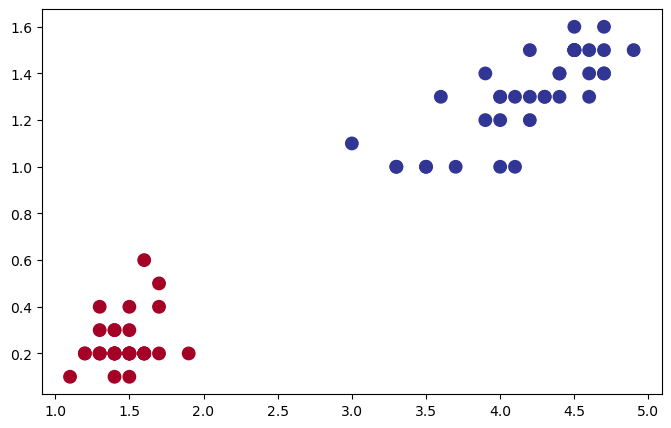

In [38]:
# Mapa de referencia de cores https://matplotlib.org/stable/gallery/color/colormap_reference.html

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c = y_train, s=80, cmap='RdYlBu')
plt.show()

In [40]:
# Criando o classificador SVM e já treinando o modelo

clf = SVC(kernel = 'linear').fit(x_train, y_train)

In [42]:
# Verificando os coeficientes

clf.coef_[0]

array([1.1769056 , 0.78337144])

In [44]:
# Salvando os coeficientes em uma variavel

coef1 = clf.coef_[0][0]
coef1

1.1769056049701343

In [48]:
# Salvando os coeficientes em uma variavel

coef2 = clf.coef_[0][1]
coef2

0.7833714351967628

In [50]:
# Salvando o intercepto em uma variável

interc = clf.intercept_
interc

array([-3.39254856])

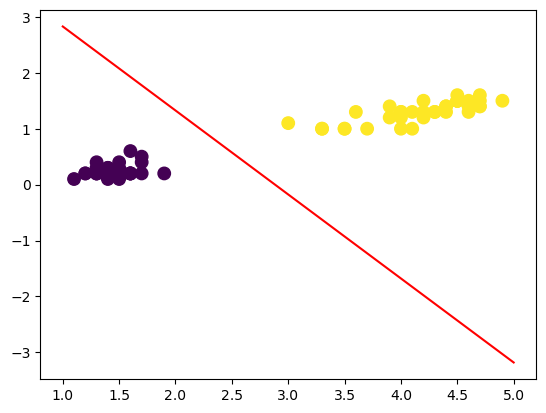

In [53]:
# Traçando a reta para separar as classes

fig, ax = plt.subplots()
ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c = y_train, s=80)

x = np.linspace(1,5,100)

y = (-coef1*x-interc) / coef2

ax.plot(x,y,'r')
plt.show()

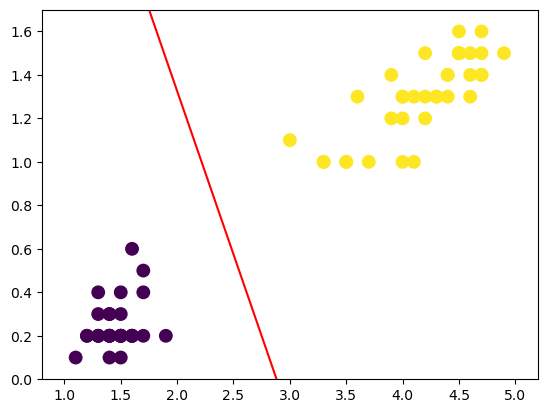

In [55]:
# Ajutsando a posição da reta de acordo com os números do gráfico (Somente para visualizar melhor)
fig, ax = plt.subplots()
ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c = y_train, s=80)

x = np.linspace(1,5,100)
y = (-coef1*x-interc) / coef2
ax.plot(x,y,'r')

ax.set(ylim = (0.0, 1.7))

plt.show()

In [57]:
# Podemos obter os vetores de suporte para traçarmos as margens e o hiperplano

clf.support_vectors_

array([[1.9, 0.2],
       [1.7, 0.5],
       [3. , 1.1]])

In [59]:
# Obtendo o primeiro vetor

v0 = clf.support_vectors_[:,0]
v0

array([1.9, 1.7, 3. ])

In [61]:
# Obtendo o segundo vetor

v1 = clf.support_vectors_[:,1]
v1

array([0.2, 0.5, 1.1])

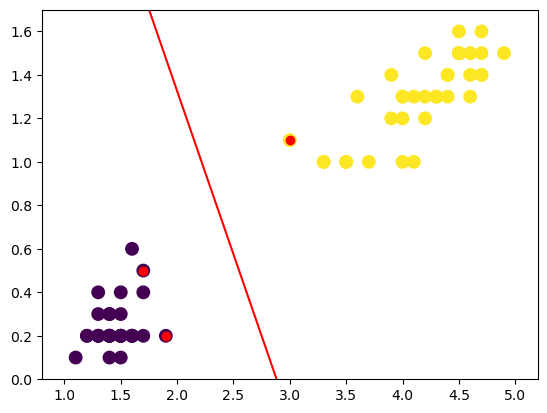

In [63]:
# Demonstrando os vetores de suporte no gráfico
fig, ax = plt.subplots()
ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c = y_train, s=80)

x = np.linspace(1,5,100)
y = (-coef1*x-interc) / coef2
ax.plot(x,y,'r')

ax.scatter(v0, v1, c='r')

ax.set(ylim = (0.0, 1.7))

plt.show()

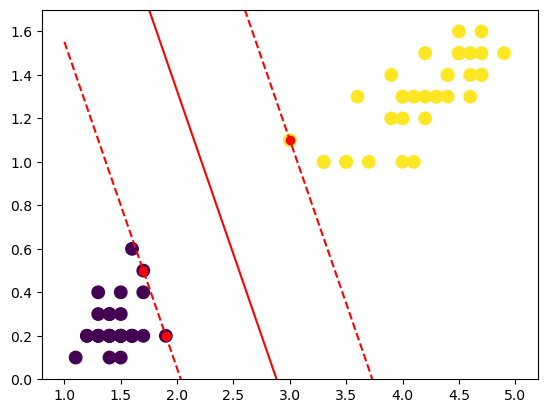

In [65]:
# Demonstrando as margens e o hiperplano através do gráfico
fig, ax = plt.subplots()
ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c = y_train, s=80)

x = np.linspace(1,5,100)

y = (-coef1*x-interc) / coef2
ax.plot(x,y,'r')

y2 = (+1 -coef1*x-interc) / coef2
ax.plot(x,y2,'--r')

y3 = (-1 -coef1*x-interc) / coef2
ax.plot(x,y3,'--r')


ax.scatter(v0, v1, c='r')

ax.set(ylim = (0.0, 1.7))

plt.show()